In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [28]:
data = yf.download('AAPL', start='2010-01-01', end='2020-12-31', auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [18]:
# data.to_excel('AAPL_Stock_Data.xlsx', sheet_name='AAPL Data')

In [30]:
data

Ticker,AAPL
Date,
2010-01-04,6.424605
2010-01-05,6.435713
2010-01-06,6.333344
2010-01-07,6.321636
2010-01-08,6.363663
...,...
2020-12-23,127.606941
2020-12-24,128.591034
2020-12-28,133.190170


In [32]:
data.head()

Ticker,AAPL
Date,
2010-01-04,6.424605
2010-01-05,6.435713
2010-01-06,6.333344
2010-01-07,6.321636
2010-01-08,6.363663


In [34]:
data.tail()

Ticker,AAPL
Date,
2020-12-23,127.606941
2020-12-24,128.591034
2020-12-28,133.190170
2020-12-29,131.416809
2020-12-30,130.296234


Today Price = Yesterday Price * e^r
r = drift + vol  * z
drift = mean - 0.5 * var

In [50]:
log_return = np.log(1+data.pct_change())

In [52]:
log_return.head()

Ticker,AAPL
Date,
2010-01-04,NaN
2010-01-05,0.001728
2010-01-06,-0.016034
2010-01-07,-0.001850
2010-01-08,0.006626


In [54]:
mean = log_return.mean()

In [56]:
mean

Ticker
AAPL    0.001088
dtype: float64

In [58]:
var = log_return.var()

In [60]:
var

Ticker
AAPL    0.000319
dtype: float64

<Axes: xlabel='Date'>

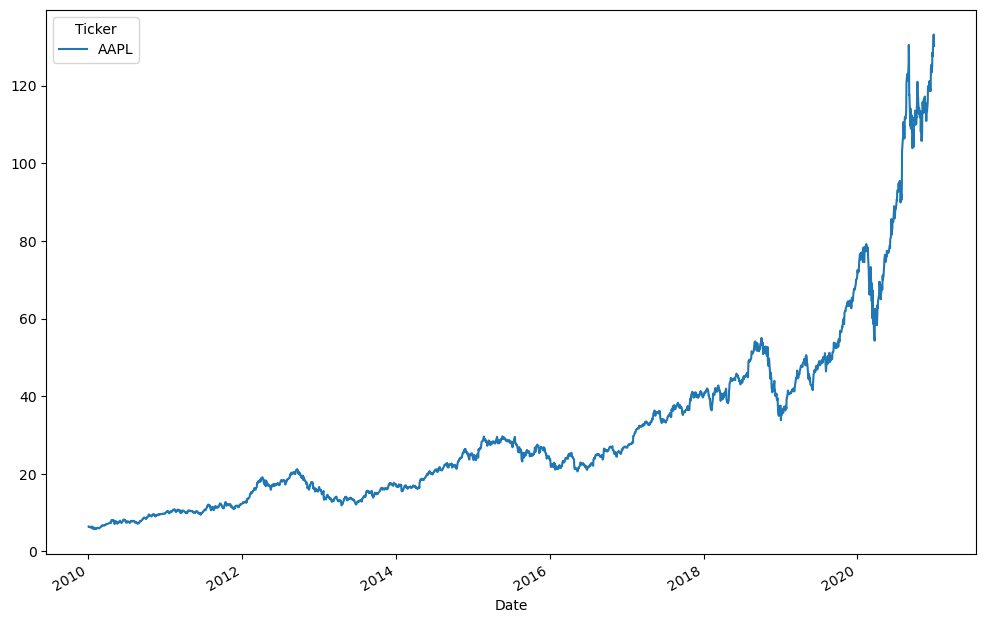

In [62]:
data.plot(figsize=(12,8))

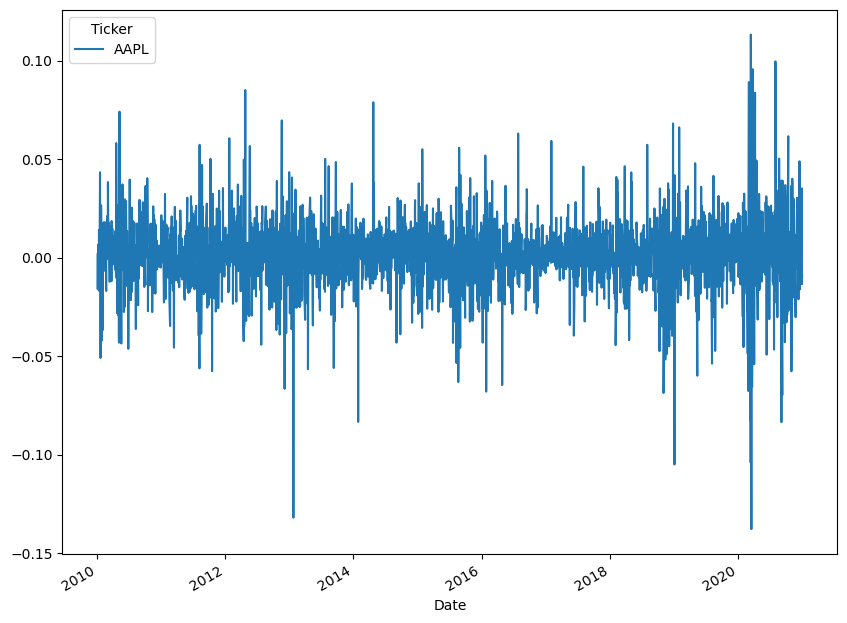

In [64]:
log_return.plot(figsize=(10,8));

In [66]:
drift = mean - 0.5 * var

In [68]:
drift

Ticker
AAPL    0.000928
dtype: float64

In [70]:
x = np.random.rand(10,2)

In [72]:
x

array([[0.25018823, 0.80835043],
       [0.5810125 , 0.28294958],
       [0.61402154, 0.08801662],
       [0.56657633, 0.31350746],
       [0.87002701, 0.2713502 ],
       [0.50806844, 0.37464132],
       [0.32255745, 0.52632506],
       [0.54385472, 0.98043452],
       [0.85504179, 0.37749173],
       [0.17675102, 0.5141556 ]])

In [74]:
z = norm.ppf(np.random.rand(10,2))

In [76]:
z

array([[-0.11996368, -0.3660245 ],
       [-1.26816161,  0.58441099],
       [ 0.47352099,  0.03305276],
       [-1.08588598,  0.82210268],
       [-1.94216929, -0.12039531],
       [ 1.32547908,  1.37389167],
       [ 1.13762031,  0.21840333],
       [ 0.17459094, -0.26203639],
       [-0.22824418, -0.22009949],
       [-1.88861733, -0.2515172 ]])

In [78]:
vol = log_return.std()

In [80]:
t_intervals = 1000
iterations = 10

In [82]:
# Make sure drift and vol are scalars, not Series
drift = float(mean - 0.5 * var)
vol = float(log_return.std())

r = pd.DataFrame(
    drift + vol * norm.ppf(np.random.rand(t_intervals, iterations))
)

C:\Users\Karan\AppData\Local\Temp\ipykernel_10492\3943916242.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  drift = float(mean - 0.5 * var)
C:\Users\Karan\AppData\Local\Temp\ipykernel_10492\3943916242.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vol = float(log_return.std())


In [84]:
r

,0,1,2,3,4,5,6,7,8,9
0,-0.015848,-0.003424,-0.015020,0.004379,0.013690,-0.000647,0.016395,0.015942,0.011241,-0.041078
1,-0.002801,0.020335,-0.000165,-0.008602,0.011668,0.008011,-0.010013,-0.010820,0.028585,0.004455
2,0.015574,0.004171,0.012936,0.017685,-0.005747,-0.024867,-0.004104,-0.030718,-0.005387,0.002059
3,-0.026038,0.048966,0.000762,0.027661,-0.021779,-0.002755,-0.009190,-0.014832,0.035783,-0.007257
4,0.034238,0.005804,-0.000072,0.001211,-0.041693,-0.013367,-0.031015,-0.016891,-0.018127,-0.018874
...,...,...,...,...,...,...,...,...,...,...
995,0.003243,-0.027979,0.014618,0.009949,0.007099,0.012941,0.025421,0.003866,-0.014174,-0.025574
996,0.009084,0.024177,-0.036331,-0.003357,0.002433,0.015425,-0.018448,0.012636,-0.016112,0.005892
997,0.015662,0.034854,0.021120,-0.008380,-0.018567,-0.016629,-0.007339,-0.012215,-0.015742,-0.007305
998,0.023387,0.026238,0.051159,-0.037440,0.013212,-0.017045,0.031745,0.000167,-0.005755,-0.022274


St = S0 * daily_return_t
st+1 = St * daily_return_t

S0 is the last price which is the first price for the simulation model

In [88]:
S0 = data.iloc[-1]

In [90]:
S0

Ticker
AAPL    130.296234
Name: 2020-12-30 00:00:00, dtype: float64

In [92]:
price_list = np.zeros_like(r)

In [94]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
price_list.shape

(1000, 10)

In [100]:
price_list[0] = S0

In [104]:
for i in range(1, t_intervals):
    price_list[i] = price_list[i - 1] * np.exp(r.iloc[i])

In [110]:
price_list

array([[130.29623413, 130.29623413, 130.29623413, ..., 130.29623413,
        130.29623413, 130.29623413],
       [129.93179797, 132.97295703, 130.27480002, ..., 128.89396469,
        134.07443557, 130.87799758],
       [131.97123899, 133.52879101, 131.97100157, ..., 124.99479852,
        133.35418401, 131.14778358],
       ...,
       [525.52572452, 520.12419307, 206.64226683, ..., 272.72101662,
        226.48634907, 168.33300764],
       [537.96099778, 533.95168784, 217.48902849, ..., 272.76646885,
        225.18663401, 164.62505574],
       [540.8108983 , 537.1794965 , 214.51532071, ..., 273.68673894,
        232.49083888, 165.26349408]])

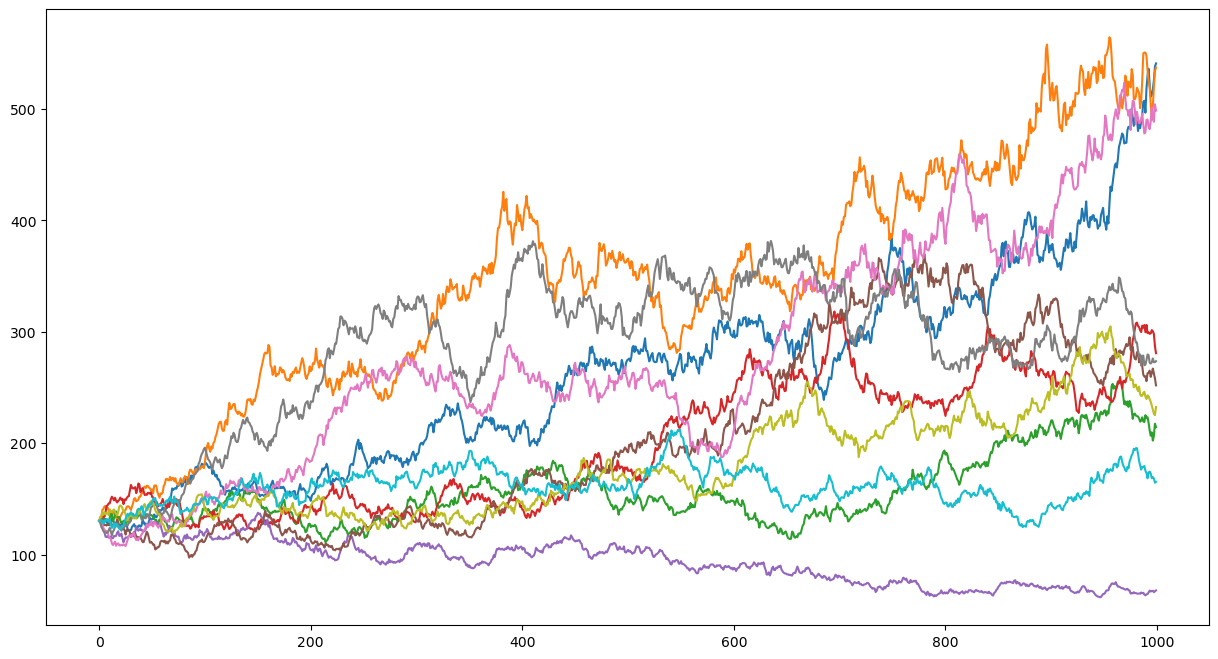

In [116]:
plt.figure(figsize=(15,8))
plt.plot(price_list)